# Preliminary pairs analysis 
### ~ A study on beta neutrality
---

In [307]:
from data_pre_processing import *
from pair_finder import *
from back_tester import *
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import os



## Data
---

In [255]:

#BTC and WBTC
#-------------------------------------------
#prices = pd.read_csv("binance_data/Wrapped BTC/2024/1m/merged_closing_prices.csv", index_col=0, parse_dates=True)


#SOL and BNSOL
#-------------------------------------------
#prices = pd.read_csv('binance_data/SOL_and_BNSOL/2025/1m/merged_closing_prices.csv', index_col=0, parse_dates=True)

#ETH and WBTC
#-------------------------------------------
#prices = pd.read_csv('binance_data/ETH_and_WBETH/2024/1m/merged_closing_prices.csv', index_col=0, parse_dates=True)

#Top 100
#-------------------------------------------
#prices = pd.read_csv('binance_data/top_100_tickers/2024/1m/merged_closing_prices.csv', index_col=0, parse_dates=True)

#ORIGINAL IN SAMPLE DATA USED: JAN - JUNE
#--------------------------------------------

#prices = pd.read_csv('tardis_data/final_in_sample_dataset/final_in_sample_dataset_5min_2024.csv', index_col=0, parse_dates=True)

#Filter for XTZUSDT_2024_5m ~ SANDUSDT_2024_5m
#prices = prices[['XTZUSDT_2024_5m', 'SANDUSDT_2024_5m']]

#Filter for JTOUSDT_2024_5m ~ NEARUSDT_2024_5m
#prices = prices[['JTOUSDT_2024_5m', 'NEARUSDT_2024_5m']]

#Filter LTCUSDT_2024_5m ~ MKRUSDT_2024_5m
#prices = prices[['LTCUSDT_2024_5m', 'MKRUSDT_2024_5m']]

#Filter BCHUSDT_2024_5m ~ MKRUSDT_2024_5m
#prices = prices[['BCHUSDT_2024_5m', 'MKRUSDT_2024_5m']]

#filter for AXSUSDT_2024_5m ~ MANAUSDT_2024_5m
#prices = prices[['AXSUSDT_2024_5m', 'MANAUSDT_2024_5m']]

#OUT OF SAMPLE DATA: JULY - SEPTEMBER
#--------------------------------------------

prices = pd.read_csv('tardis_data/final_training_set/final_training_set_5min_2024.csv', index_col=0,parse_dates=True)
#prices = prices[['MANAUSDT_2024_5m', 'SANDUSDT_2024_5m']]

#Filter for AXSUSDT_2024_5m ~ SANDUSDT_2024_5m
prices = prices[['AXSUSDT_2024_5m', 'SANDUSDT_2024_5m']]

#Filter for AXSUSDT_2024_5m ~ MANAUSDT_2024_5m
#prices = prices[['AXSUSDT_2024_5m', 'MANAUSDT_2024_5m']]

In [256]:
prices = prices.loc['2024-07-01 00:00:00':'2024-09-30 23:55:00']
#prices = prices.loc['2024-01-30 23:55:00':'2024-06-30 23:55:00']
prices

,MANAUSDT_2024_5m,SANDUSDT_2024_5m
timestamp,,
2024-07-01 00:00:00,0.3387,0.3304
2024-07-01 00:05:00,0.3387,0.3304
2024-07-01 00:10:00,0.3392,0.3310
2024-07-01 00:15:00,0.3389,0.3311
2024-07-01 00:20:00,0.3391,0.3313
...,...,...
2024-09-29 23:35:00,0.3205,0.2892
2024-09-29 23:40:00,0.3211,0.2890
2024-09-29 23:45:00,0.3220,0.2904


In [257]:
#prices = prices[['XRP/USDT_2024_1m', 'ADA/USDT_2024_1m']]

#prices = prices[['DOT/USDT_2024_1m', 'XTZ/USDT_2024_1m']]

#BCH/USDT_2024_1m & DOGE/USDT_2024_1m
#-------------------------------------------
#prices = prices[['BCH/USDT_2024_1m', 'DOGE/USDT_2024_1m']]

#GALA/USDT_2024_1m & GRT/USDT_2024_1m,0.0056584346126191745,-4.071777010162084
#-------------------------------------------
#prices = prices[['GALA/USDT_2024_1m', 'GRT/USDT_2024_1m']]

#Filter for pair XRPUSDT_2024_5m ~ ADAUSDT_2024_5m

#prices = prices[['XRPUSDT_2024_5m', 'ADAUSDT_2024_5m']]

#Filter for INJUSDT_2024_5m ~ LDOUSDT_2024_5m

#prices = prices[['INJUSDT_2024_5m', 'LDOUSDT_2024_5m']]

#prices = prices[['DOGEUSDT_2024_5m', 'LTCUSDT_2024_5m']]

# Filter for pair NEXOUSDT_2024_5m ~ BTCUSDT_2024_5m
#prices = prices[['NEXOUSDT_2024_5m', 'BTCUSDT_2024_5m']]

#Filter for pair HBARUSDT_2024_5m ~ MANAUSDT_2024_5
#prices = prices[['HBARUSDT_2024_5m', 'MANAUSDT_2024_5m']]

#Filter for pair MANAUSDT_2024_5m ~ SANDUSDT_2024_5m
#prices = prices[['MANAUSDT_2024_5m', 'SANDUSDT_2024_5m']]

#Filter by AXSUSDT_2024_5m ~ MANAUSDT_2024_5m
#prices = prices[['AXSUSDT_2024_5m', 'MANAUSDT_2024_5m']]

#Filter for INJUSDT_2024_5m ~ LDOUSDT_2024_5m
#prices = prices[['INJUSDT_2024_5m', 'LDOUSDT_2024_5m']]

#Filter for LTCUSDT_2024_5m ~ MKRUSDT_2024_5m	
#prices = prices[['LTCUSDT_2024_5m', 'MKRUSDT_2024_5m']]

#Filter for JTOUSDT_2024_5m ~ NEARUSDT_2024_5m
#prices = prices[['JTOUSDT_2024_5m', 'NEARUSDT_2024_5m']]

#Filter for SEIUSDT_2024_5m ~ CRVUSDT_2024_5m
#prices = prices[['SEIUSDT_2024_5m', 'CRVUSDT_2024_5m']]

#Filter by FLOWUSDT_2024_5m ~ SANDUSDT_2024_5m
#prices = prices[['FLOWUSDT_2024_5m', 'SANDUSDT_2024_5m']]

#Filter by FLOWUSDT_2024_5m ~ MANAUSDT_2024_5m
#prices = prices[['FLOWUSDT_2024_5m', 'MANAUSDT_2024_5m']]

#Filter by XTZUSDT_2024_5m ~ SANDUSDT_2024_5m
#prices = prices[['XTZUSDT_2024_5m', 'SANDUSDT_2024_5m']]

In [258]:
prices

,MANAUSDT_2024_5m,SANDUSDT_2024_5m
timestamp,,
2024-07-01 00:00:00,0.3387,0.3304
2024-07-01 00:05:00,0.3387,0.3304
2024-07-01 00:10:00,0.3392,0.3310
2024-07-01 00:15:00,0.3389,0.3311
2024-07-01 00:20:00,0.3391,0.3313
...,...,...
2024-09-29 23:35:00,0.3205,0.2892
2024-09-29 23:40:00,0.3211,0.2890
2024-09-29 23:45:00,0.3220,0.2904


In [259]:
# #Filter prices from January 2024 to March 2024
# #-------------------------------------------

# prices = prices.loc['2024-01-01':'2024-06-29']

# #Resample the data to 5 minutes
# #-------------------------------------------
# prices = prices.resample('5T').last()

## Params
---

In [260]:
#Params:
window_size = 288 # It seems like as this increases, the percent absolute delta beta error decreases!
entry_threshold= 1 #3 was prev
exit_threshold= 0
stop_loss_threshold = 2

## Investigation
---

In [261]:
sym1, sym2 = prices.columns
print(f"\nTesting strategy on pair: {sym1} and {sym2} ...")
S1 = prices[sym1]
S2 = prices[sym2]

# Compute the spread series and beta_series 
spread_series, beta_series, alpha_series = compute_spread_series(S1, S2, window_size)
#print(f"Hedge ratio (beta) for {sym1} ~ {sym2}: {beta:.4f}")

# Compute rolling z-score using the provided helper function.
zscore_series, rolling_mean, rolling_std = compute_rolling_zscore(spread_series, window_size)

#                                   FOR CLOSING PRICE DATA
#------------------------------------------------------------------------------------------
# Generate trading signals (positions) based on the spread's z-score
positions, trade_entries, trade_exits = backtest_pair_rolling(S1,S2,zscore_series, entry_threshold, exit_threshold, stop_loss_threshold)



Testing strategy on pair: MANAUSDT_2024_5m and SANDUSDT_2024_5m ...


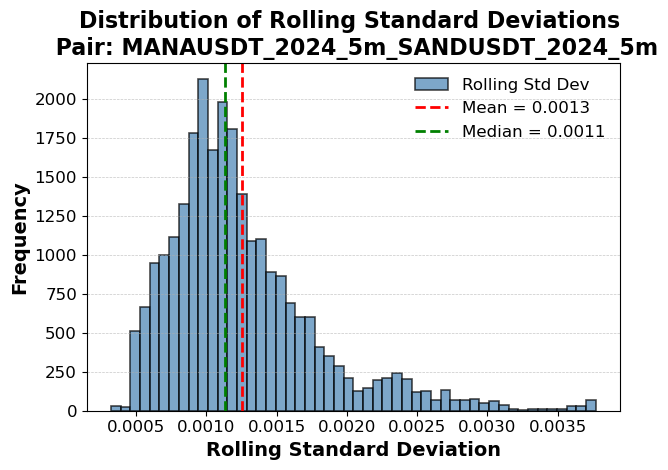

In [262]:

# Set figure size and dpi for sharpness
#plt.figure(figsize=(8, 6), dpi=300)

# Plot histogram with thicker edge and more visible bars
plt.hist(rolling_std, bins=50, alpha=0.7, color='steelblue', edgecolor='black', linewidth=1.2, label='Rolling Std Dev')

# Add mean line, thicker
plt.axvline(rolling_std.mean(), color='red', linestyle='--', linewidth=2, 
            label=f'Mean = {rolling_std.mean():.4f}')

# Add median line, thicker
plt.axvline(rolling_std.median(), color='green', linestyle='--', linewidth=2, 
            label=f'Median = {rolling_std.median():.4f}')

# Add title with larger, bold font
plt.title(f'Distribution of Rolling Standard Deviations \n Pair: {sym1}_{sym2}', fontsize=16, fontweight='bold')

# Add axis labels with larger font
plt.xlabel('Rolling Standard Deviation', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

# Customize tick labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add legend with larger font, no frame
plt.legend(fontsize=12, frameon=False)

# Optional: Add subtle grid
plt.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.7)

# Tight layout
plt.tight_layout()

# Save the plot as a high-resolution PNG file

# Show plot
plt.show()


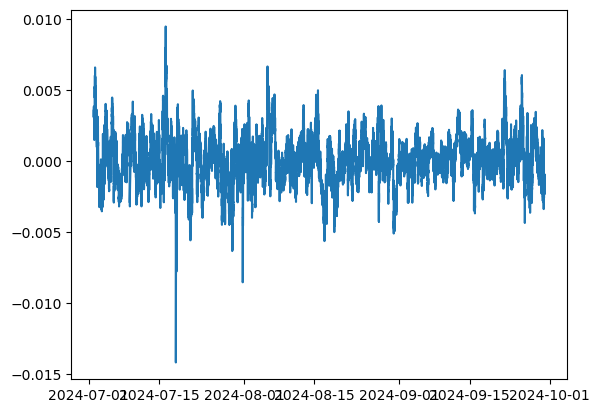

In [263]:
plt.plot(spread_series)

In [264]:
initial_capital = 10_000.0
#tx_cost= 0.00031 #0.031% transaction cost
tx_cost= 0.00025 #0.025% transaction cost #Binance level 5 Maker Cost

trade_profits,transaction_costs,net_trade_profits_S1, net_trade_profits_S2,cumulative_profit_series, entry_times, exit_times = simulate_strategy_trade_pnl(trade_entries, trade_exits, initial_capital, beta_series, tx_cost)

In [265]:
#Avergae trnasaction costs
transaction_costs = np.array(transaction_costs)
average_transaction_cost = transaction_costs.mean()
average_transaction_cost

4.997190972349619

In [266]:
len(trade_profits)

149

In [267]:
#calculate number of positive trades
positive_trades = len([p for p in trade_profits if p > 0])

# Calculate the number of trades
total_trades = len(trade_profits)
percentage_wins = (positive_trades / total_trades) * 100

percentage_wins

53.691275167785236

In [268]:
trade_profits_absolute = np.array(trade_profits)
trade_profits_absolute = np.abs(trade_profits_absolute)

positive_trade_profits = [p for p in trade_profits if p > 0]
negative_trade_profits = [p for p in trade_profits if p < 0]


print(f"Average trade profit: {np.mean(trade_profits):.4f}")
print(f"Average absolute trade profit: {np.mean(trade_profits_absolute):.4f}")
print(f"Average positive trade profit: {np.mean(positive_trade_profits):.4f}")
print(f"Average negative trade profit: {np.mean(negative_trade_profits):.4f}")

max_drawndown = compute_max_drawdown(initial_capital,cumulative_profit_series)
print(f"Max drawdown: {max_drawndown:.4f} %")

Average trade profit: -0.5896
Average absolute trade profit: 25.9766
Average positive trade profit: 23.6416
Average negative trade profit: -28.6837
Max drawdown: 5.9169 %


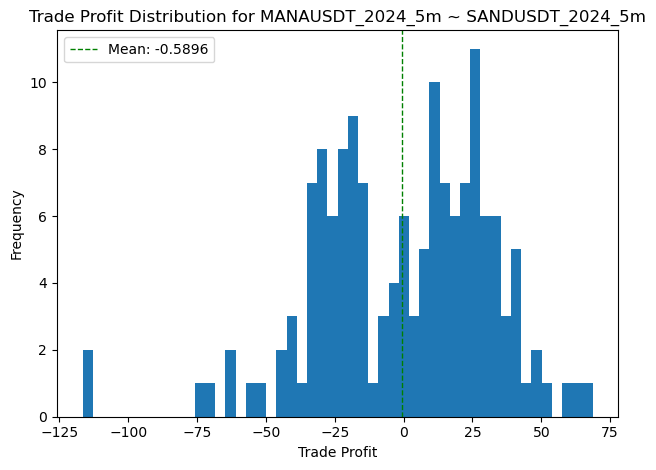

In [269]:
plt.hist(trade_profits, bins=50)
#plt.axvline(0, color='red', linestyle='dashed', linewidth=1)
plt.axvline(np.mean(trade_profits), color='green', linestyle='dashed', linewidth=1, label=f'Mean: {np.mean(trade_profits):.4f}')
plt.legend()
plt.xlabel('Trade Profit')
plt.ylabel('Frequency')
plt.title(f'Trade Profit Distribution for {sym1} ~ {sym2}')
plt.tight_layout()

Total return:  -0.8784883032541553 %


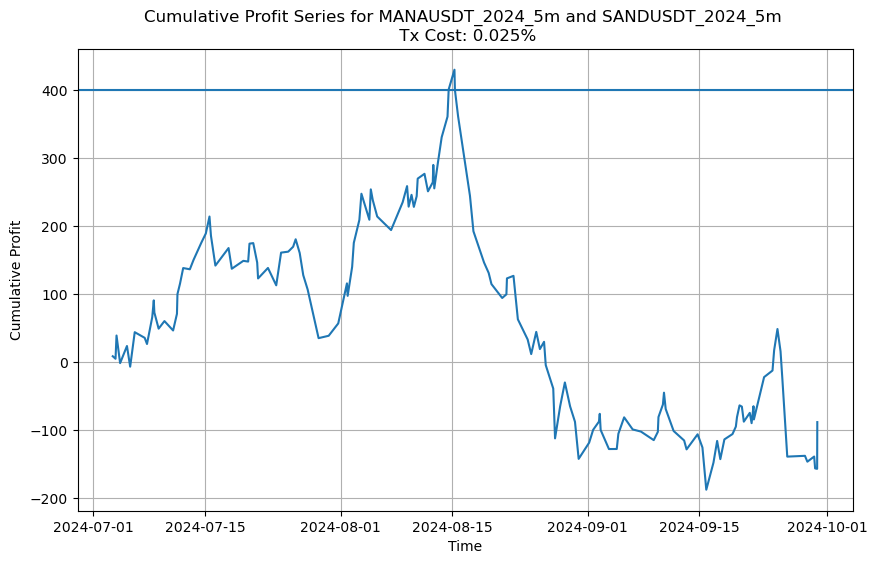

In [270]:
print("Total return: ", cumulative_profit_series.iloc[-1]/initial_capital * 100, "%")
plt.figure(figsize=(10, 6))
plt.plot(cumulative_profit_series, label='Cumulative Profit Series')
plt.axhline(400)
plt.title(f"Cumulative Profit Series for {sym1} and {sym2} \n Tx Cost: {tx_cost*100}%")
plt.xlabel("Time")
plt.ylabel("Cumulative Profit")
plt.grid()
plt.show()


# DQN Analysis
---

In [271]:
zscore_series_window = zscore_series.iloc[2100: 3100]
zscore_series_window

timestamp
2024-07-08 07:00:00    0.089657
2024-07-08 07:05:00    0.078117
2024-07-08 07:10:00    0.235231
2024-07-08 07:15:00    0.120633
2024-07-08 07:20:00   -0.710086
                         ...   
2024-07-11 17:55:00    1.726340
2024-07-11 18:00:00    1.293414
2024-07-11 18:05:00    1.578102
2024-07-11 18:10:00    1.523345
2024-07-11 18:15:00    1.451622
Length: 1000, dtype: float64

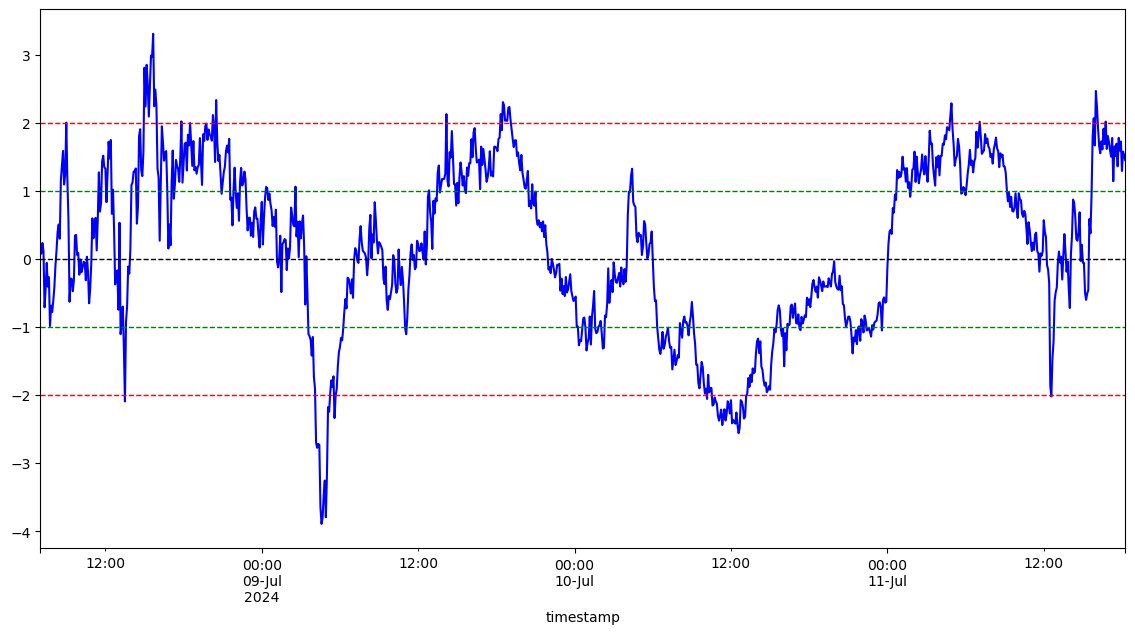

In [272]:
start_date = pd.to_datetime('2024-02-01 00:20:00')
end_date = pd.to_datetime('2024-02-10 00:40:00')

#Convert the entry and exit times to datetime objects

stop_loss_threshold = 2
plt.figure(figsize=(14, 7))
zscore_series_window.plot(label='Z-Score', color='blue')
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.axhline(1, color='green', linestyle='--', linewidth=1)
plt.axhline(-1, color='green', linestyle='--', linewidth=1)
plt.axhline(stop_loss_threshold, color='red', linestyle='--', linewidth=1)
plt.axhline(-stop_loss_threshold, color='red', linestyle='--', linewidth=1)

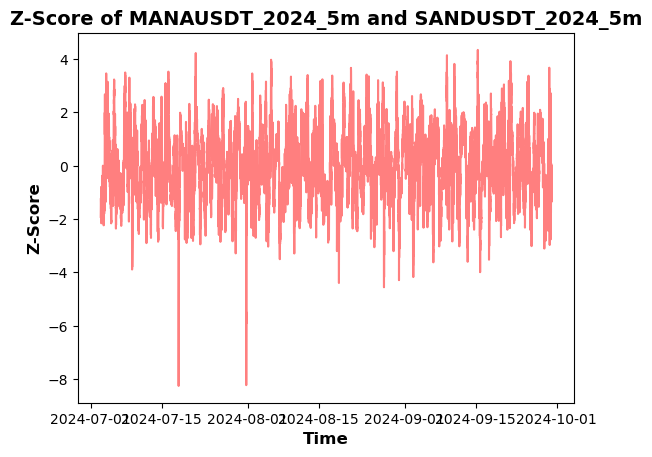

In [273]:



plt.plot(zscore_series, label='Z-Score', color='red', alpha=0.5)
plt.xlabel('Time', fontsize=12, fontweight='bold')
plt.ylabel('Z-Score', fontsize=12, fontweight='bold')
plt.title(f'Z-Score of {sym1} and {sym2}', fontsize=14, fontweight='bold')
plt.savefig(f"results/preliminary_pair_analysis/{sym1}_{sym2}/Z_score.png", dpi=300)

In [274]:
cumulative_returns = (cumulative_profit_series / initial_capital) * 100
cumulative_returns

2024-07-03 10:25:00    0.089272
2024-07-03 18:45:00    0.052248
2024-07-03 21:45:00    0.393718
2024-07-04 08:35:00   -0.011828
2024-07-05 05:10:00    0.239762
                         ...   
2024-09-28 13:15:00   -1.460245
2024-09-29 09:45:00   -1.384499
2024-09-29 12:35:00   -1.558808
2024-09-29 18:40:00   -1.565067
2024-09-29 19:10:00   -0.878488
Length: 149, dtype: float64

In [275]:
cumulative_returns

2024-07-03 10:25:00    0.089272
2024-07-03 18:45:00    0.052248
2024-07-03 21:45:00    0.393718
2024-07-04 08:35:00   -0.011828
2024-07-05 05:10:00    0.239762
                         ...   
2024-09-28 13:15:00   -1.460245
2024-09-29 09:45:00   -1.384499
2024-09-29 12:35:00   -1.558808
2024-09-29 18:40:00   -1.565067
2024-09-29 19:10:00   -0.878488
Length: 149, dtype: float64

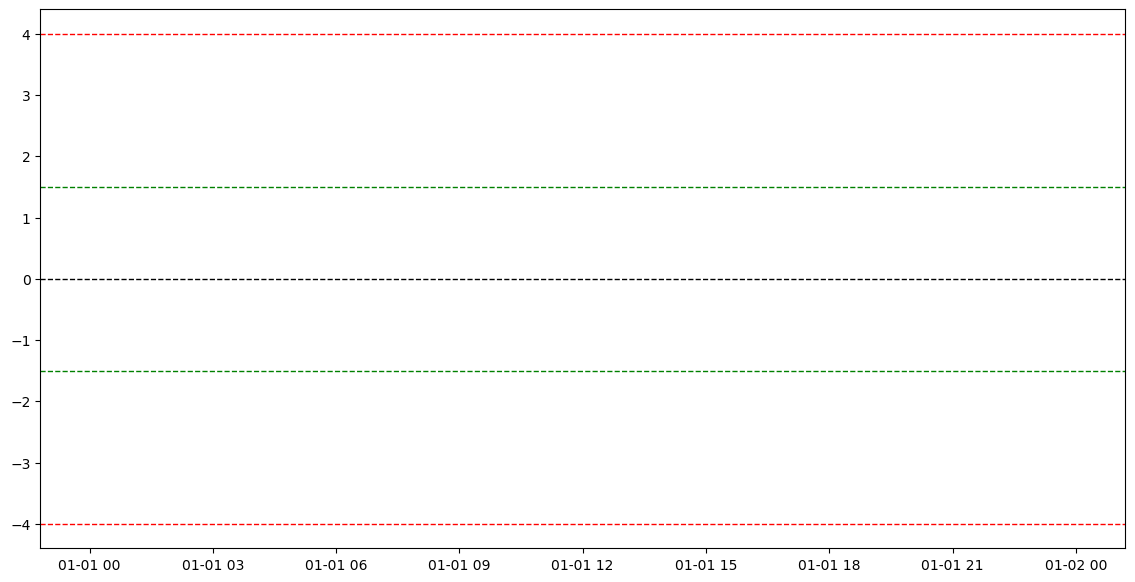

In [276]:
plt.figure(figsize=(14, 7))
plt.plot(zscore_series.loc['2024-01-17 22:35:00':'2024-01-18 08:10:00'])
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.axhline(1.5, color='green', linestyle='--', linewidth=1)
plt.axhline(-1.5, color='green', linestyle='--', linewidth=1)
plt.axhline(4, color='red', linestyle='--', linewidth=1)
plt.axhline(-4, color='red', linestyle='--', linewidth=1)

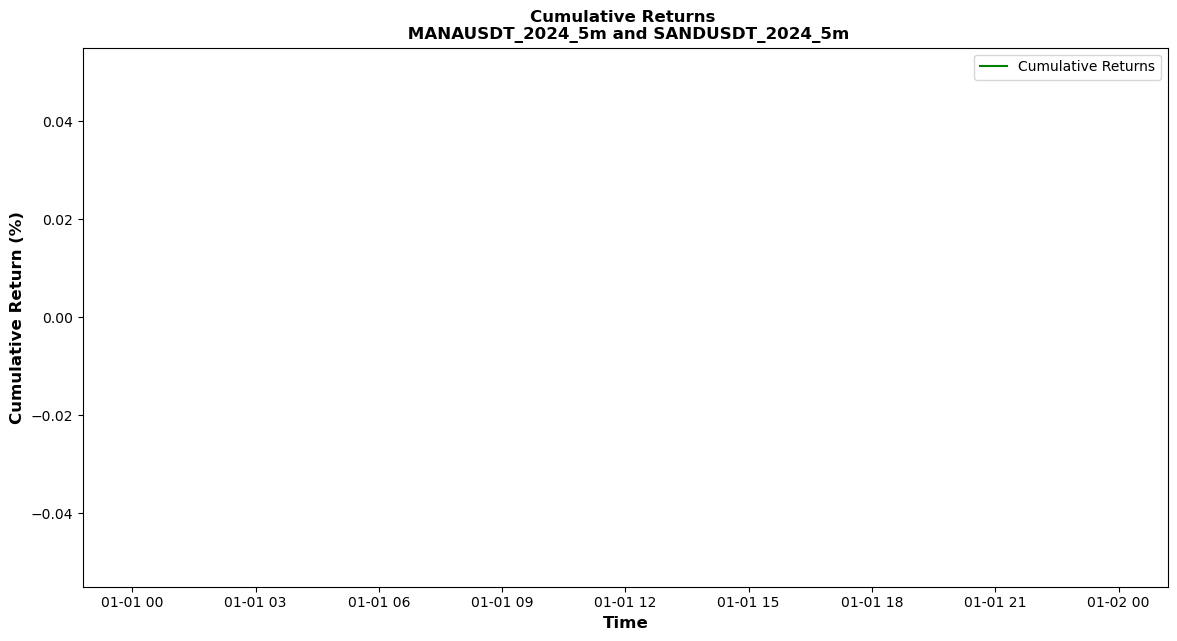

In [277]:
plt.figure(figsize=(14, 7))

plt.plot(cumulative_returns.loc['2024-01-03':'2024-02-01'], label='Cumulative Returns', color = 'green')
plt.title(f"Cumulative Returns \n {sym1} and {sym2}", fontsize = 12, fontweight='bold')
plt.xlabel('Time', fontsize = 12, fontweight='bold')
plt.ylabel('Cumulative Return (%)' , fontsize = 12, fontweight='bold')
plt.legend()

#Save the plot to the results folder for this pair. Create the folder if it doesn't exist.
if not os.path.exists(f"results/preliminary_pair_analysis/{sym1}_{sym2}"):
    os.makedirs(f"results/preliminary_pair_analysis/{sym1}_{sym2}")
#Save the plot
plt.savefig(f"results/preliminary_pair_analysis/{sym1}_{sym2}/Cumulative_Returns.png", dpi=300)

In [278]:
#Compute non-stop loss win rate

trade_losses = [profit for profit in trade_profits if profit < 0]
trade_wins = [profit for profit in trade_profits if profit > 0]
non_stop_loss_win_rate = len(trade_wins) / (len(trade_wins) + len(trade_losses)) * 100



if(stop_loss_threshold > 50):

    print(f"Average trade wins: {np.mean(trade_wins):.2f}")
    print(f"Average trade losses: {np.mean(trade_losses):.2f}")
    print(f"Number of wins: {len(trade_wins)}")
    print(f"Number of losses: {len(trade_losses)}")
    print(f"Non-stop loss win rate: {non_stop_loss_win_rate:.2f}%")



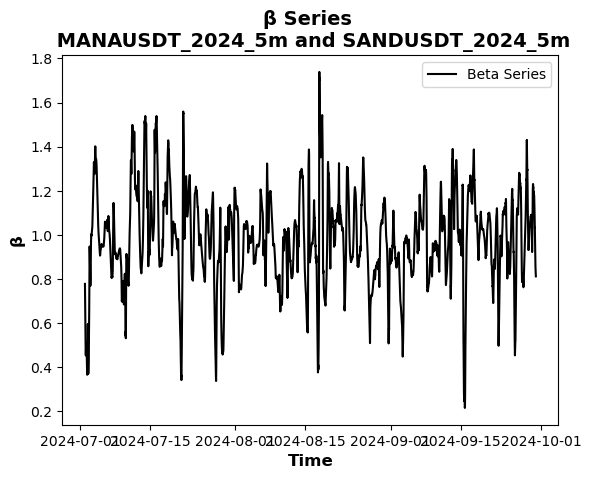

In [279]:
plt.plot(beta_series, label='Beta Series', color = 'black')
plt.title(f"β Series \n {sym1} and {sym2}", fontsize = 14, fontweight='bold')
plt.xlabel('Time', fontsize=12, fontweight='bold')
plt.ylabel('β', fontsize=12, fontweight='bold')
plt.legend()
plt.savefig(f"results/preliminary_pair_analysis/{sym1}_{sym2}/Beta_Series.png", dpi=300)

In [280]:

#Compute beta series returns
beta_series_returns = beta_series.pct_change().dropna()

#Compute mean of beta series returns
mean_beta_series = beta_series_returns.mean()
print(f"Mean of beta series returns: {mean_beta_series:.4f}")
#Compute median of beta series returns
median_beta_series = beta_series_returns.median()
print(f"Median of beta series returns: {median_beta_series:.4f}")

#Compute variance of beta series returns
std_beta_series = beta_series_returns.std() * 100
print(f"Std of beta series returns: {std_beta_series:.4f}")


#Volatility of the spread
z_score_spread_std = zscore_series.std()
print(f"Spread Standard Deviation: {z_score_spread_std:.4f}")

Mean of beta series returns: 0.0000
Median of beta series returns: -0.0001
Std of beta series returns: 0.5137
Spread Standard Deviation: 1.2354


In [281]:
#Compute Median Absolute Deviation of the beta series returns 
median = np.median(beta_series_returns)
mad = np.median(np.abs(beta_series_returns - median)) * 100
mad 

0.1565244208744765

In [282]:
median_beta_series

-0.00011870614590314688

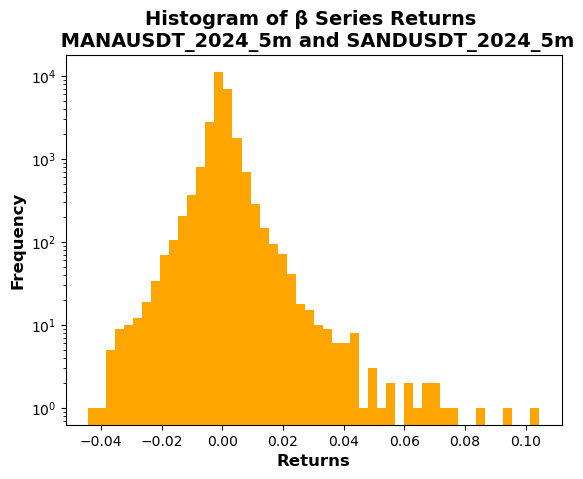

In [283]:
#Plot histogram of beta series returns
plt.hist(beta_series_returns, bins=50, color='orange', log=True)
plt.title(f"Histogram of β Series Returns \n {sym1} and {sym2}", fontsize=14, fontweight='bold')
plt.xlabel('Returns', fontsize=12, fontweight='bold')
plt.ylabel('Frequency',fontsize=12, fontweight='bold')
plt.savefig(f"results/preliminary_pair_analysis/{sym1}_{sym2}/Beta_Series_Returns_Histogram.png", dpi=300)

In [284]:
trade_durations = [(exit - entry).total_seconds() / 60 for entry, exit in zip(entry_times, exit_times)]

In [285]:
#Percentage changes in S1 and S2 each trade
trade_percentage_changes = []
for entry_time, exit_time in zip(entry_times, exit_times):
    # Calculate percentage change for S1 and S2
    price_change_S1 = (S1[exit_time] - S1[entry_time]) / S1[entry_time] * 100
    price_change_S2 = (S2[exit_time] - S2[entry_time]) / S2[entry_time] * 100
    trade_percentage_changes.append((price_change_S1, price_change_S2))

#Average absolute percentage change in S1 and S2
average_absolute_percentage_changes = [abs(s1+s2)/2 for s1, s2 in trade_percentage_changes]

#Compute abs trade profits 
abs_trade_profits = [abs(profit) for profit in trade_profits]
abs_trade_returns = [abs(profit / initial_capital) * 100 for profit in trade_profits]
#Compute average trade profits

Correlation between average absolute percentage changes and absolute trade returns (%): 0.1374


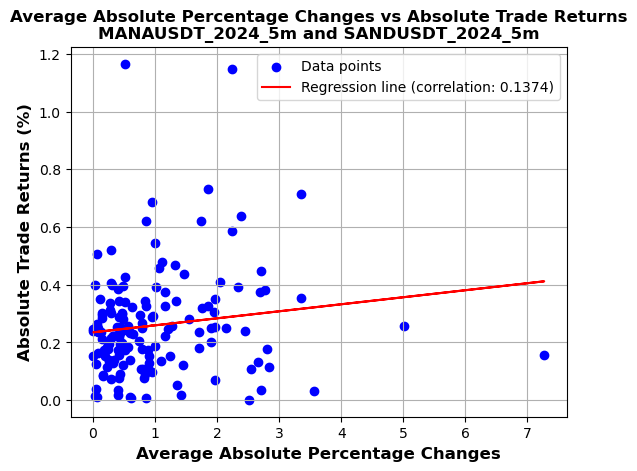

In [286]:
#Scatter plot for average_absolute_percentage_changes vs abs_trade_profits with regression line

# Fit a linear regression model


#Compute correlation between average_absolute_percentage_changes and abs_trade_profits
correlation = np.corrcoef(average_absolute_percentage_changes, abs_trade_profits)[0, 1]
print(f"Correlation between average absolute percentage changes and absolute trade returns (%): {correlation:.4f}")

X = np.array(average_absolute_percentage_changes).reshape(-1, 1)
y = np.array(abs_trade_returns)
model = LinearRegression()
model.fit(X, y)
# Predict y values
y_pred = model.predict(X)
# Plot the scatter plot with regression line
plt.scatter(average_absolute_percentage_changes, abs_trade_returns, label='Data points', color='blue')
plt.plot(average_absolute_percentage_changes, y_pred, color='red', label='Regression line (correlation: {:.4f})'.format(correlation))
plt.xlabel('Average Absolute Percentage Changes', fontsize = 12, fontweight='bold')
plt.ylabel('Absolute Trade Returns (%)',fontsize = 12, fontweight='bold')
plt.title(f'Average Absolute Percentage Changes vs Absolute Trade Returns\n{sym1} and {sym2}', fontsize = 12, fontweight='bold')
#Add correlation to the legend

plt.legend()
plt.grid()

#Save the plot to the results folder for this pair. Create the folder if it doesn't exist.
# if not os.path.exists(f"results/{sym1}_{sym2}"):
#     os.makedirs(f"results/{sym1}_{sym2}")
#Save the plot
plt.savefig(f"results/preliminary_pair_analysis/{sym1}_{sym2}/Average_Absolute_Percent_Changes_Vs_Absolute_Trade_Returns.png", dpi=300)







In [287]:
#Check Effect Of net Exposure 
beta_series_trades = beta_series[entry_times]

avg_beta = np.mean(beta_series_trades)

if(avg_beta < 1):
    net_exposure = "S1"
else:
    net_exposure = "S2"

print("avg_beta: ", avg_beta)
print(f"Net exposure: {net_exposure}")



avg_beta:  0.977548496951553
Net exposure: S1


In [288]:
#An example of a trade where you were net long S1 but still made profit due to S2's hedge, where S2 moved more than S1

# Trade type: -1, Entry time: 2024-03-18 03:12:00, Exit time: 2024-03-18 05:41:00
# Net Trade profit (includes fees): 58.2461918883329
# Beta at entry (Not the absolute value): 0.6246522836635335
# Notional S1: 6155.163231267156, Notional S2: 3844.836768732843, Shares S1 : 9871.953859289744, Shares S2: 5721.483286804826
# Percentage change S1: 0.38%, Percentage change S2: 2.26%
# Trade Num: 65

In [289]:
#Check if losses were caused due to losses in leg that you are nex exposed to

positions_trades = list(positions[entry_times])
S1_trade_returns = [percentage_changes[0] for percentage_changes in trade_percentage_changes]
S2_trade_returns = [percentage_changes[1] for percentage_changes in trade_percentage_changes]

net_exposed_return = []

if net_exposure == "S1":
    net_exposed_return = S1_trade_returns
elif net_exposure == "S2":
    net_exposed_return = S2_trade_returns

losses_due_to_exposure = 0

for position, net_exposed_return, trade_profit in zip(positions_trades,net_exposed_return,trade_profits):

    if(position == 1 and net_exposed_return < 0 and trade_profit < 0 or position == -1 and net_exposed_return > 0 and trade_profit < 0):
        losses_due_to_exposure +=1
    
    elif trade_profit < 0 :
        print(f"Position {position}, Net Exposed Return: {net_exposed_return}, Trade Profit: {trade_profit}")

    # elif (position == 1 and net_exposed_return < 0 and trade_profit > 0 or position == -1 and net_exposed_return > 0 and trade_profit > 0):

    #     print(f"Position {position}, Net Exposed Return: {net_exposed_return}, Trade Profit: {trade_profit}")



print(f"Number of trades where losses were due to exposure: {losses_due_to_exposure}")
print(f"Percentage of losses caused due to exposure: {losses_due_to_exposure / len(trade_losses) * 100:.2f}%")

Position 1, Net Exposed Return: 0.12763241863433678, Trade Profit: -8.281881496370827
Position -1, Net Exposed Return: -0.6221349050425713, Trade Profit: -17.904933692149783
Position 1, Net Exposed Return: 0.16035920461834524, Trade Profit: -13.820506305913103
Position 1, Net Exposed Return: 0.4345127250155222, Trade Profit: -1.797731829717728
Position -1, Net Exposed Return: -1.390047261606896, Trade Profit: -43.90684423107021
Position 1, Net Exposed Return: 0.1110802554845908, Trade Profit: -1.0570089252603019
Position -1, Net Exposed Return: -0.338123415046486, Trade Profit: -23.33440119300928
Position 1, Net Exposed Return: 1.8045112781954902, Trade Profit: -20.23531939028031
Position 1, Net Exposed Return: 0.0, Trade Profit: -21.06743296818077
Position 1, Net Exposed Return: 2.797619047619037, Trade Profit: -71.44555636898338
Position -1, Net Exposed Return: -2.4259721726721275, Trade Profit: -38.25896920266983
Position 1, Net Exposed Return: 0.37411148522259674, Trade Profit: -19

In [290]:

#Get actual Betas used for each trade entry
beta_entries = [beta_series[entry] for entry in entry_times]

trade_ranges = [(entry, exit) for entry, exit in zip(entry_times, exit_times)]

#Get beta series in the trade ranges

beta_series_trade_ranges = [beta_series[entry:exit].iloc[1:] for entry, exit in trade_ranges] #iloc[1:] to exclude the first beta value which is the same as the entry beta

#Calculate the percent absolute difference between the beta at the trade entry and the betas in the trade range
absolute_percent_delta_betas = [np.abs(((entry_beta - beta_range)/entry_beta)*100) for entry_beta, beta_range in zip(beta_entries, beta_series_trade_ranges)]

#Calculate the mean delta beta for each trade
mean_absolute_percent_delta_betas = [np.mean(delta) for delta in absolute_percent_delta_betas]


In [291]:
#Median of the mean delta betas
median_mean_absolute_percent_delta_beta = np.median(mean_absolute_percent_delta_betas)
mean_absolute_percent_delta_beta = np.mean(mean_absolute_percent_delta_betas)
print(f"Mean of the mean delta betas: {median_mean_absolute_percent_delta_beta:.4f}")
print(f"Median of the mean delta betas: {mean_absolute_percent_delta_beta:.4f}")


Mean of the mean delta betas: 2.7728
Median of the mean delta betas: 5.9581


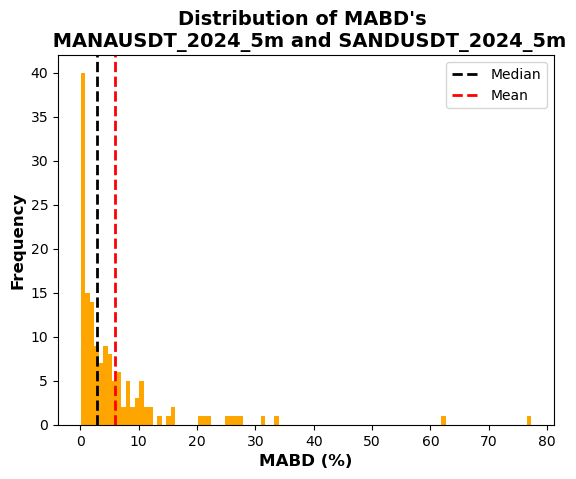

In [292]:
plt.hist(mean_absolute_percent_delta_betas, bins = 100, color='orange')
plt.axvline(median_mean_absolute_percent_delta_beta, color='black', linestyle='dashed', linewidth=2, label='Median')
plt.axvline(mean_absolute_percent_delta_beta, color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.title(f"Distribution of MABD's \n {sym1} and {sym2}", fontsize = 14, fontweight='bold')
plt.xlabel('MABD (%)', fontsize = 12, fontweight='bold')
plt.ylabel('Frequency', fontsize = 12, fontweight='bold')
plt.legend()
plt.savefig(f"results/preliminary_pair_analysis/{sym1}_{sym2}/MABD_Distribution.png", dpi=300)



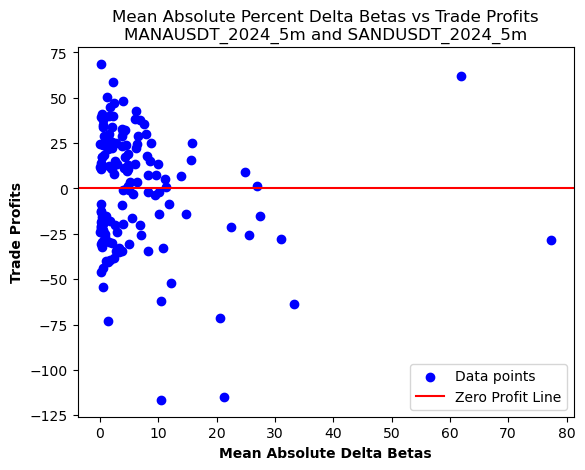

In [293]:
plt.scatter(mean_absolute_percent_delta_betas, trade_profits, color = 'blue', label='Data points')
plt.xlabel('Mean Absolute Delta Betas', fontweight = 'bold')
plt.ylabel('Trade Profits', fontweight='bold')
plt.title(f'Mean Absolute Percent Delta Betas vs Trade Profits\n{sym1} and {sym2}')
plt.axhline(0, color = 'red', label='Zero Profit Line')
plt.legend()

# #Save the plot to the results folder for this pair. Create the folder if it doesn't exist.
# # if not os.path.exists(f"results/{sym1}_{sym2}"):
# #     os.makedirs(f"results/{sym1}_{sym2}")
# #Save the plot
# #plt.savefig(f"results/{sym1}_{sym2}/Mean_Absolute_Percent_Delta_Betas_Vs_Trade_Profits.png", dpi=300)


# Buckets for mean absolute percent delta betas
---

In [294]:
#Create ranges from mean_absolute_delta_betas using the max value

# #Create ranges from 0 to max_mean_absolute_percent_delta_beta with a step of 5%

max_mean_absolute_percent_delta_beta = max(mean_absolute_percent_delta_betas)

ranges = np.arange(0, max_mean_absolute_percent_delta_beta, 10)

#zip elements of the array with the next element
ranges = list(zip(ranges[:-1], ranges[1:]))



# #Create tuples of ranges
# ranges = [(i, (i+5)) for i in ranges]


# ranges = []

# #
# for i in range(0, max_mean_absolute_percent_delta_beta, 5):
#     ranges.append((i, (i+5)/100))

#Count the number of trades where the mean absolute delta beta is in the range
mean_absolute_percent_delta_betas_ranges_counts = []
for i in range(len(ranges)):
    mean_absolute_percent_delta_betas_ranges_counts.append(0)

#Count the number of trades where the mean absolute delta beta is in the range
for mean_absolute_percent_delta_beta in mean_absolute_percent_delta_betas:
    for i in range(len(ranges)):
        if mean_absolute_percent_delta_beta >= ranges[i][0] and mean_absolute_percent_delta_beta < ranges[i][1]:
            mean_absolute_percent_delta_betas_ranges_counts[i] += 1
            break

In [295]:
buckets = [i for i in range(len(ranges))]


#Create a dataframe with the bucket number corresponding to each range
ranges_df = pd.DataFrame({'Bucket': [i for i in buckets], 'Mean_Absolute_Percent_Delta_Beta_Range (%)': [(ranges[i][0],ranges[i][1]) for i in range(len(ranges))], "Number of Trades": mean_absolute_percent_delta_betas_ranges_counts})
ranges_df


,Bucket,Mean_Absolute_Percent_Delta_Beta_Range (%),Number of Trades
0,0,"(0.0, 10.0)",125
1,1,"(10.0, 20.0)",13
2,2,"(20.0, 30.0)",7
3,3,"(30.0, 40.0)",2
4,4,"(40.0, 50.0)",0
5,5,"(50.0, 60.0)",0
6,6,"(60.0, 70.0)",1


In [296]:
trades_data = list(zip(trade_profits,mean_absolute_percent_delta_betas))

trade_win_rates = []
probability_of_losses = []
trade_wins_list = [] #Keep track of the number of trade wins for each range/bucket
trade_losses_list = [] #Keep track of the number of trade losses for each range/bucket

for delta_range in ranges:
    trade_wins = 0
    trade_losses = 0
    probability_of_loss = 0
    for trade_data in trades_data:
        if trade_data[1] >= delta_range[0] and trade_data[1] <= delta_range[1]: #If the mean_absolute_percent_delta_beta for this trade was in the range
            if trade_data[0] > 0: #If the trade profit was positive
                trade_wins += 1
            else:
                trade_losses += 1 #If the trade profit was negative
    if trade_wins + trade_losses > 0: #If there were any trades in this range
        trade_wins_percentage = trade_wins / (trade_wins + trade_losses) * 100
        probability_of_loss = trade_losses / (trade_wins + trade_losses) * 100
        trade_range = (delta_range[0], delta_range[1])
        print(f"Range: {delta_range[0]} - {delta_range[1]}, Trade wins: {trade_wins}, Trade losses: {trade_losses}, Probability of loss: {probability_of_loss:.2f}%")
    else:   
        probability_of_loss = "N/A"
        

    trade_win_rates.append(trade_wins_percentage)
    probability_of_losses.append(probability_of_loss)
    trade_wins_list.append(trade_wins)
    trade_losses_list.append(trade_losses)
    

ranges_df['Number of Trade Wins'] = trade_wins_list
ranges_df['Number of Trade Losses'] = trade_losses_list
ranges_df['Probability of Loss (%)'] = probability_of_losses

    

Range: 0.0 - 10.0, Trade wins: 72, Trade losses: 53, Probability of loss: 42.40%
Range: 10.0 - 20.0, Trade wins: 5, Trade losses: 8, Probability of loss: 61.54%
Range: 20.0 - 30.0, Trade wins: 2, Trade losses: 5, Probability of loss: 71.43%
Range: 30.0 - 40.0, Trade wins: 0, Trade losses: 2, Probability of loss: 100.00%
Range: 60.0 - 70.0, Trade wins: 1, Trade losses: 0, Probability of loss: 0.00%


In [297]:
ranges_df.head(50)

,Bucket,Mean_Absolute_Percent_Delta_Beta_Range (%),Number of Trades,Number of Trade Wins,Number of Trade Losses,Probability of Loss (%)
0,0,"(0.0, 10.0)",125,72,53,42.4
1,1,"(10.0, 20.0)",13,5,8,61.538462
2,2,"(20.0, 30.0)",7,2,5,71.428571
3,3,"(30.0, 40.0)",2,0,2,100.0
4,4,"(40.0, 50.0)",0,0,0,N/A
5,5,"(50.0, 60.0)",0,0,0,N/A
6,6,"(60.0, 70.0)",1,1,0,0.0


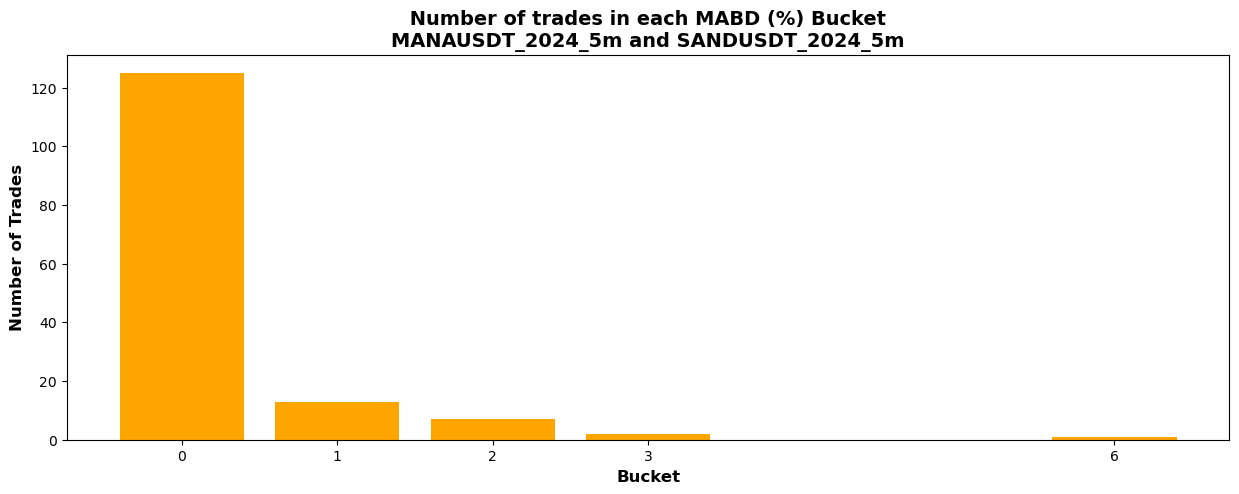

In [298]:
#Filter out the ranges with 0 trades
ranges_df = ranges_df[ranges_df['Number of Trades'] > 0] 

buckets = ranges_df['Bucket']
number_of_trades = ranges_df['Number of Trades']

#Create a bar plot of the number of trades in each bucket
plt.figure(figsize=(15, 5))
plt.bar(buckets, number_of_trades, color = 'orange')
plt.xticks(buckets)
plt.xlabel('Bucket', fontsize = 12,fontweight = 'bold')
plt.ylabel('Number of Trades', fontsize = 12, fontweight = 'bold')
plt.title(f' Number of trades in each MABD (%) Bucket \n{sym1} and {sym2}', fontsize = 14, fontweight = 'bold')

plt.savefig(f"results/preliminary_pair_analysis/{sym1}_{sym2}/Number_of_Trades_in_Buckets.png", dpi=300)

# Probability of loss given delta neutrality 
---


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


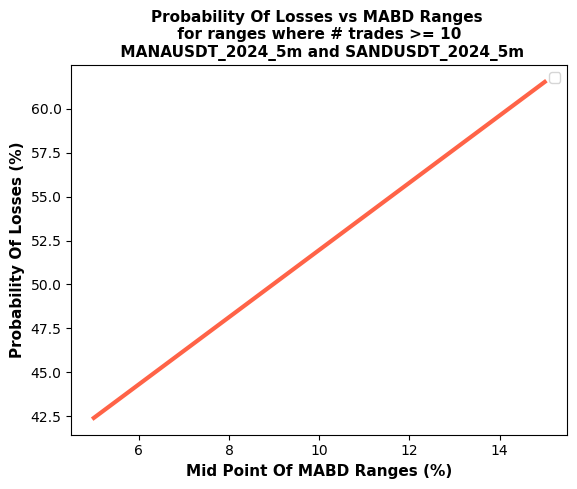

In [299]:
#Filter out rows where the number of trades is less than 3
ranges_df_filtered = ranges_df[ranges_df['Number of Trades'] >= 10]


ranges_mid_points = [(full_range[0]+full_range[1])/2 for full_range in ranges_df_filtered['Mean_Absolute_Percent_Delta_Beta_Range (%)']]

# #Plot trade ranges and probability of losses on a line chart

#plt.figure(figsize=(8, 6))
plt.plot(ranges_mid_points, ranges_df_filtered['Probability of Loss (%)'], color='tomato', linewidth=3)
plt.xlabel('Mid Point Of MABD Ranges (%)', fontsize = 11, fontweight='bold')
plt.ylabel('Probability Of Losses (%)', fontsize = 11, fontweight='bold')
plt.title(f'Probability Of Losses vs MABD Ranges \n for ranges where # trades >= 10 \n {sym1} and {sym2}', fontsize = 11, fontweight='bold')
plt.legend()

plt.savefig(f"results/preliminary_pair_analysis/{sym1}_{sym2}/Probability_of_Losses_Vs_MABD_Ranges.png", dpi=300)

# Trade duration vs mean absolute percent delta beta
---

In [300]:
# #Create scatter plot of trade durations vs mean absolute percent delta betas



# plt.scatter(trade_durations, mean_absolute_percent_delta_betas, color='blue')
# plt.xlabel('Trade Durations (minutes)', fontweight='bold')  
# plt.ylabel('Mean Absolute Percent Delta Betas', fontweight='bold')
# plt.title(f'Trade Durations vs Mean Absolute Percent Delta Betas\n{sym1} and {sym2}', fontweight='bold')



### There is no clear relationship here. My hypothesis is that it really comes down to home much Beta fluctuates. Beta could fluctate a very small amount for long trade intervals and a lot for shorter trade intervals and vice-versa, hence no clear relationship.

In [301]:
# #Trade durations distribution
# plt.hist(trade_durations, bins=100)
# plt.xlabel('Trade Durations (minutes)', fontweight='bold')
# plt.ylabel('Frequency', fontweight='bold')
# plt.title(f'Trade Durations Distribution\n{sym1} and {sym2}', fontweight='bold')
# plt.axvline(np.mean(trade_durations), color='r', linestyle='dashed', linewidth=1)
# plt.axvline(np.median(trade_durations), color='g', linestyle='dashed', linewidth=1)

# Summart of metrics
----

In [302]:
#Create dataframe to store key metrics:


trade_losses = [profit for profit in trade_profits if profit < 0]
trade_wins = [profit for profit in trade_profits if profit > 0]
non_stop_loss_win_rate = len(trade_wins) / (len(trade_wins) + len(trade_losses)) * 100


mean_trade_duration = np.mean(trade_durations)
average_absolute__percent_delta_beta = np.mean(mean_absolute_percent_delta_betas)
median_MABD = np.median(mean_absolute_percent_delta_betas)
average_S1_trade_returns = np.mean(S1_trade_returns)
average_S2_trade_returns = np.mean(S2_trade_returns)


key_metrics = pd.DataFrame({
    'Pair': f"{sym1} ~ {sym2}",
    'Total return (%)': cumulative_profit_series[-1]/initial_capital * 100,
    'Number of trades': len(trade_profits),
    'Non-stop loss win rate (%)': non_stop_loss_win_rate,
    f'Mean trade duration/Reversion speed from threshold (mins)': mean_trade_duration,
    'Average entry beta': avg_beta,
    'Median MABD (%)': median_MABD,
    'Beta series returns MAD (%)': mad,
    #'Spread series z-score std (%)': z_score_spread_std,
    'Average S1 trade returns (%)': average_S1_trade_returns,
    'Average S2 trade returns (%)': average_S2_trade_returns,
},index=[0])

#Save key metrics to csv
#key_metrics.to_csv(f'results/preliminary_pair_analysis/{sym1}_{sym2}/key_metrics.csv', index=False)

/var/folders/rc/tn2ys5g55157vhhlmn0_vfwr0000gq/T/ipykernel_79620/2302241602.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'Total return (%)': cumulative_profit_series[-1]/initial_capital * 100,


In [303]:
key_metrics

,Pair,Total return (%),Number of trades,Non-stop loss win rate (%),Mean trade duration/Reversion speed from threshold (mins),Average entry beta,Median MABD (%),Beta series returns MAD (%),Average S1 trade returns (%),Average S2 trade returns (%)
0,MANAUSDT_2024_5m ~ SANDUSDT_2024_5m,-0.878488,149,53.691275,221.577181,0.977548,2.772765,0.156524,-0.089246,-0.138474


In [304]:
#Losses are due to errors in Beta estimation. Prices move more or less than expected under the estimated ratio, leaving you unhedged.
#Large gains and losses are due to increased volatility in each asset. Larger swings in price lead to larger profits and losses.

#Conversely, if the pair is less tightly linked (or if the cointegration relationship temporarily weakens), both the idiosyncrasies in the raw prices and the increased uncertainty in β will contribute to a more volatile spread


#SO FAR, WE HAVE REVERSION TIME, VOLATILITY OF SPREAD, AND VARIANCE OF BETA SERIES RETURNS, AND 

In [305]:
# THE LESS DELTA NEUTRAL YOU ARE IN A TRADE, THE MORE LIKELY THAT TRADE WILL BE A LOSS (SURELY)

In [306]:
# #Final Results of key metrics
# #-------------------------------------------

# import pandas as pd
# from io import StringIO

# data = """
# Pair,Total return (%),Number of trades,Non-stop loss win rate (%),Mean trade duration,Average entry beta,Mean Absolute Delta Beta,Beta series returns std (%),Spread series z-score std (%),Average S1 trade returns (%),Average S2 trade returns (%)
# BTC/USDT_2024_1m ~ WBTC/USDT_2024_1m,147.19401003804424,1279,99.60906958561377,11.622361219702892,0.9837260795888084,0.0019311730197191343,0.030551051389107076,1.0616665497264384,0.015197681520520393,0.009241096536673626
# WBETH/USDT_2024_1m ~ ETH/USDT_2024_1m,201.38788951840615,1779,99.94378864530636,5.40584598088814,1.0343795832837148,0.0008368575103401775,0.020863703429873502,1.030477228772458,-0.026812002440444422,0.023770359561098135
# GALA/USDT_2024_1m ~ GRT/USDT_2024_1m,35.84736589838036,149,67.78523489932886,333.40939597315435,0.10322350474156707,0.03557753406369779,51.970838947805994,1.269245332426155,0.4608833679557246,0.28643320861289073
# XRP/USDT_2024_1m ~ ADA/USDT_2024_1m,25.216167865874084,151,68.87417218543047,330.7549668874172,0.48583222609478255,0.1558442919739403,64.66020920375905,1.2637673380192604,0.09647456946200408,0.12545288661319812
# """

# df = pd.read_csv(StringIO(data))

# df